In [2]:
from classy import Class

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from math import pi

Used class_public/notebooks/cltt_terms.ipynb for reference

In [4]:
#############################################
#
# Cosmological parameters and other CLASS parameters
#
common_settings = {# LambdaCDM parameters
                   'h':0.67810,
                   'omega_b':0.02238280,
                   'omega_cdm':0.1201075,
                   'A_s':2.100549e-09,
                   'n_s':0.9660499,
                   'tau_reio':0.05430842 ,
                   # output and precision parameters
                   'output':'tCl,pCl,lCl',
                   'lensing':'yes',
                   'l_max_scalars':5000}
#
M = Class()
#
###############
#    
# call CLASS for the total Cl's and then for each contribution
#
###############
#
M.set(common_settings)
M.compute()
cl_tot = M.raw_cl(3000)
cl_lensed = M.lensed_cl(3000)
M.empty()           # reset input
#
M.set(common_settings) # new input
M.set({'temperature contributions':'tsw'}) 
M.compute()
cl_tsw = M.raw_cl(3000) 
M.empty()
#
M.set(common_settings)
M.set({'temperature contributions':'eisw'})
M.compute()
cl_eisw = M.raw_cl(3000) 
M.empty()
#
M.set(common_settings)
M.set({'temperature contributions':'lisw'})
M.compute()
cl_lisw = M.raw_cl(3000) 
M.empty()
#
M.set(common_settings)
M.set({'temperature contributions':'dop'})
M.compute()
cl_dop = M.raw_cl(3000) 
M.empty()

In [6]:
# esthetic definitions for the plots
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
#matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

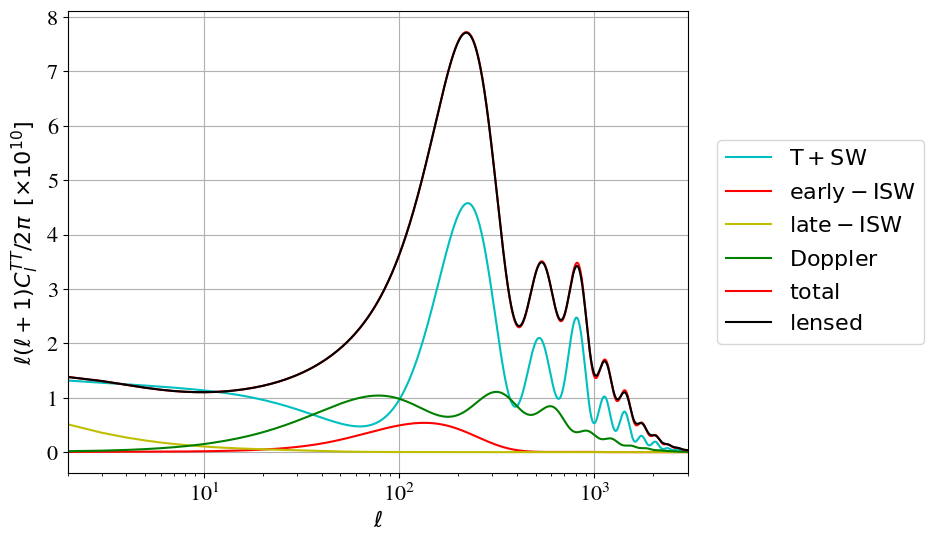

In [7]:
#################
#
# start plotting
#
#################
#
plt.xlim([2,3000])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{TT} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.grid()
#
ell = cl_tot['ell']
factor = 1.e10*ell*(ell+1.)/2./pi
plt.semilogx(ell,factor*cl_tsw['tt'],'c-',label=r'$\mathrm{T+SW}$')
plt.semilogx(ell,factor*cl_eisw['tt'],'r-',label=r'$\mathrm{early-ISW}$')
plt.semilogx(ell,factor*cl_lisw['tt'],'y-',label=r'$\mathrm{late-ISW}$')
plt.semilogx(ell,factor*cl_dop['tt'],'g-',label=r'$\mathrm{Doppler}$')
plt.semilogx(ell,factor*cl_tot['tt'],'r-',label=r'$\mathrm{total}$')
plt.semilogx(ell,factor*cl_lensed['tt'],'k-',label=r'$\mathrm{lensed}$')
#
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))

The above plot is what is generated by the provided code

In [8]:
#plt.savefig('cltt_terms.pdf',bbox_inches='tight')

In [23]:
#############################################
#
# Cosmological parameters and other CLASS parameters
#
common_settings = {# LambdaCDM parameters
                   'h':0.67810,
                   'omega_b':0.02238280,
                   'omega_cdm':0.1201075,
                   'A_s':2.100549e-09,
                   'n_s':0.9660499,
                   'tau_reio':0.05430842 ,
                   # output and precision parameters
                   'output':'tCl,pCl,lCl',
                   'lensing':'yes',
                   'l_max_scalars':5000}
#
M = Class()
#
###############
#    
# call CLASS for the total Cl's and then for each contribution
#
###############
# # Fiducial model, part A
M.set(common_settings)
M.compute()
cl_tot = M.raw_cl(3000)
cl_lensed = M.lensed_cl(3000)
M.empty()           # reset input
#
# # Matter density Omega_M increased by 10%
omega_m_settings = common_settings
omega_m_settings['omega_cdm'] = common_settings['omega_cdm'] * 1.10
M.set(omega_m_settings)
M.compute()
cl_omegam = M.raw_cl(3000)
M.empty()
#
# # Spectral index ns increased by 10%
ns_settings = common_settings
ns_settings['n_s'] = common_settings['n_s'] * 1.10
M.set(ns_settings)
M.compute()
cl_ns = M.raw_cl(3000)
M.empty()
#
# # Amplitude A increased by 10%
A_settings = common_settings
A_settings['A_s'] = common_settings['A_s'] * 1.10
M.set(A_settings)
M.compute()
cl_A = M.raw_cl(3000)
M.empty()
#
# # Baryon density increased by 10%
omega_b_settings = common_settings
omega_b_settings['omega_b'] = common_settings['omega_b'] * 1.10
M.set(omega_b_settings)
M.compute()
cl_omegab = M.raw_cl(3000)
M.empty()
#



In [10]:
# esthetic definitions for the plots
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
#matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

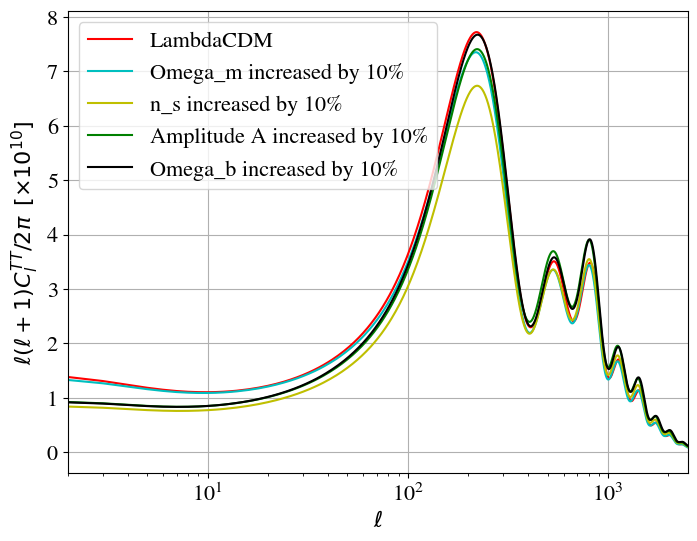

In [37]:
#################
#
# start plotting
#
#################
#
plt.xlim([2,2500])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{TT} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.grid()
#
ell = cl_tot['ell']
factor = 1.e10*ell*(ell+1.)/2./pi

plt.semilogx(ell,factor*cl_tot['tt'],'r-',label='LambdaCDM')
plt.semilogx(ell,factor*cl_omegam['tt'],'c-',label='Omega_m increased by 10%')
plt.semilogx(ell,factor*cl_ns['tt'],'y-',label='n_s increased by 10%')
plt.semilogx(ell,factor*cl_A['tt'],'g-',label='Amplitude A increased by 10%')
plt.semilogx(ell,factor*cl_omegab['tt'],'k-',label='Omega_b increased by 10%')

#
plt.legend(loc='upper left')

Part C:

Omega_m: power spectrum has a lower highest peak than the LCDM model, most of the smaller peaks due to acoustic oscillations are slightly lower in amplitude

n_s: power spectrum has a lower highest peak and lower second peak than the LCDM model, but the other peaks are slightly higher than the LCDM model

A: power spectrum has a lower first peak but all following peaks have higher amplitude

Omega_b: First and second peaks align mostly with LCDM, following peaks are increased in amplitude

##Problem 13.9 Huterer

In [38]:
import numpy as np
from scipy import integrate
from scipy.integrate import odeint

In [40]:
## Constants
Lambda_2s_1s = 8.22 # s^-1
wavelength_Ly_alpha = 1216e-10 # m
m_e = 0.511e6 # electron mass, eV/c^2
B_21 = 3.4 # eV
T_0 = 2.73 # K
a_0 = 1 # scale factor today
H_0 = 70 # km/s Mpc^-1 
omega_R = 0.01
omega_M = 0.30
omega_Lambda = 0.69

In [51]:
def a(t):
    return np.sqrt(2*H_0*t)*omega_R**(1/4)

In [ ]:
def T(t):
    return (T_0/a_0)*a(t)

In [41]:
def z(T): # redshift in terms of temp
    return T/(a_0*T_0) - 1

In [42]:
def H(T):
    a = a_0 * T_0 / T
    z = 1/a - 1
    hubble_param = np.sqrt(H_0**2 * (omega_R * a**-4 + omega_M * a**-3 + omega_Lambda))
    return hubble_param

In [43]:
def n_H(T):
    a = a_0 * T_0 / T
    return 0.25 * 1/a**3

In [44]:
def Lambda_Ly_alpha(T, xe):
    numerator = 8*np.pi*H(T)
    denominator = 3*n_H(T)*(1-xe)*wavelength_Ly_alpha**3
    return numerator/denominator

In [45]:
def alpha_H(T):
    return 2.8e-17 * 1/np.sqrt(T)

In [46]:
def beta_H(T):
    return 1/4 * alpha_H(T) * np.sqrt((m_e*T)/(2*np.pi)) * np.exp(-1*B_21/T)

In [47]:
def C(T, xe):
    numerator = 3/4 * Lambda_Ly_alpha(T, xe) + 1/4 * Lambda_2s_1s
    denominator = beta_H(T) + 3/4 * Lambda_Ly_alpha(T, xe) + 1/4 * Lambda_2s_1s
    return numerator/denominator

In [48]:
def RHS(t, xe): # right hand side of peebles
    temp=T(t)
    parenthetical = n_H(temp) * xe**2 * alpha_H(temp) # ignoring second term
    return -1 * C(temp, xe) * parenthetical

/var/folders/99/vfh56jrs1nqcj8zqtcs5fkv40000gn/T/ipykernel_20131/1179138199.py:2: RuntimeWarning: invalid value encountered in sqrt
  return 2.8e-17 * 1/np.sqrt(T)
/var/folders/99/vfh56jrs1nqcj8zqtcs5fkv40000gn/T/ipykernel_20131/4067434641.py:2: RuntimeWarning: overflow encountered in exp
  return 1/4 * alpha_H(T) * np.sqrt((m_e*T)/(2*np.pi)) * np.exp(-1*B_21/T)


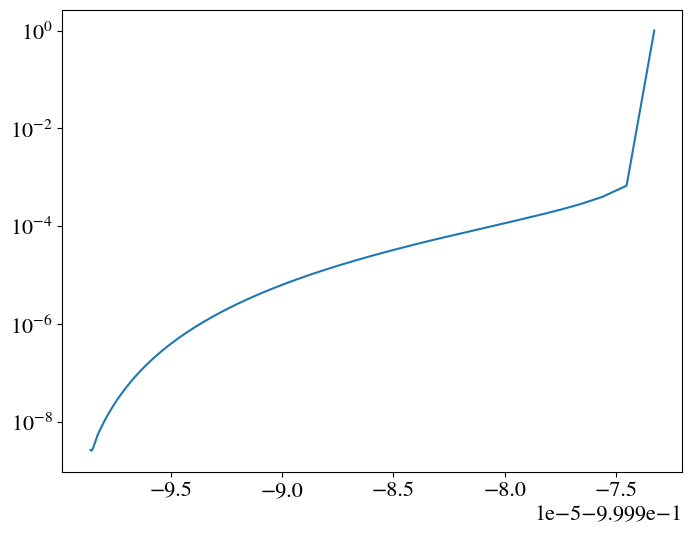

In [61]:

# try scipy.integrate.odeint

t = np.linspace(10e7, 10e10, num=10000) # got overflow warnings when I went to higher values for t
#z = np.linspace()
# TODO: figure out how to integrate
# using 1 as initial xe (for T=0)
xes = odeint(RHS, 1, t, )

zs = [1/a(time) -1 for time in t]
# plot xe vs z, this should look like fig 13.5
plt.yscale("log")  
plt.plot(zs, xes)

#this does not look like it is supposed to